In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [10]:
datadir = 'D:\\Images\\car_dataset\\train'
labels = []
for category in os.listdir(datadir):
    labels.append(category)

print(labels)

['swift', 'wagonr']


In [11]:
# labels = ['rugby', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [12]:
# Now we fetch our train and validation data.
train = get_data('D:\\Images\\car_dataset\\train')
val = get_data('D:\\Images\\car_dataset\\validation')

C:\Users\satyam.singh\anaconda3\envs\keras\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

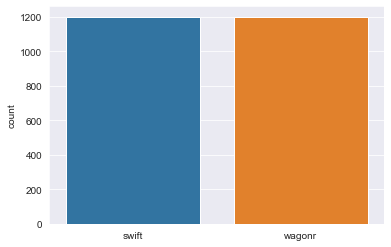

In [14]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("swift")
    else:
        l.append("wagonr")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'swift')

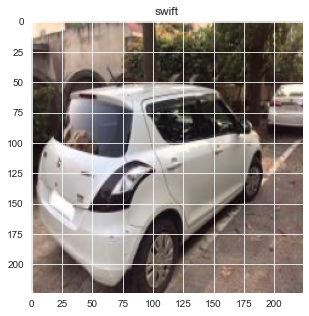

In [19]:
plt.figure(figsize = (5,5))
plt.imshow(train[3][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'wagonr')

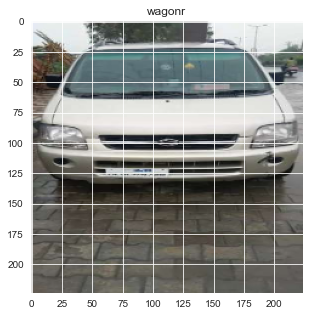

In [20]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [21]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [23]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [25]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [26]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [28]:
history = model.fit(x_train,y_train,epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
75/75 [==============================] - 76s 1s/step - loss: 0.6897 - accuracy: 0.5654 - val_loss: 0.6885 - val_accuracy: 0.6062
Epoch 2/10
75/75 [==============================] - 74s 986ms/step - loss: 0.6893 - accuracy: 0.5638 - val_loss: 0.6874 - val_accuracy: 0.5987
Epoch 3/10
75/75 [==============================] - 73s 979ms/step - loss: 0.6886 - accuracy: 0.5646 - val_loss: 0.6868 - val_accuracy: 0.6137
Epoch 4/10
75/75 [==============================] - 72s 964ms/step - loss: 0.6872 - accuracy: 0.5767 - val_loss: 0.6860 - val_accuracy: 0.6175
Epoch 5/10
75/75 [==============================] - 74s 984ms/step - loss: 0.6875 - accuracy: 0.5767 - val_loss: 0.6853 - val_accuracy: 0.6187
Epoch 6/10
75/75 [==============================] - 73s 972ms/step - loss: 0.6859 - accuracy: 0.5942 - val_loss: 0.6842 - val_accuracy: 0.6288
Epoch 7/10
75/75 [==============================] - 73s 970ms/step - loss: 0.6849 - accuracy: 0.5946 - val_loss: 0.6830 - val_accuracy: 0.6338
Ep

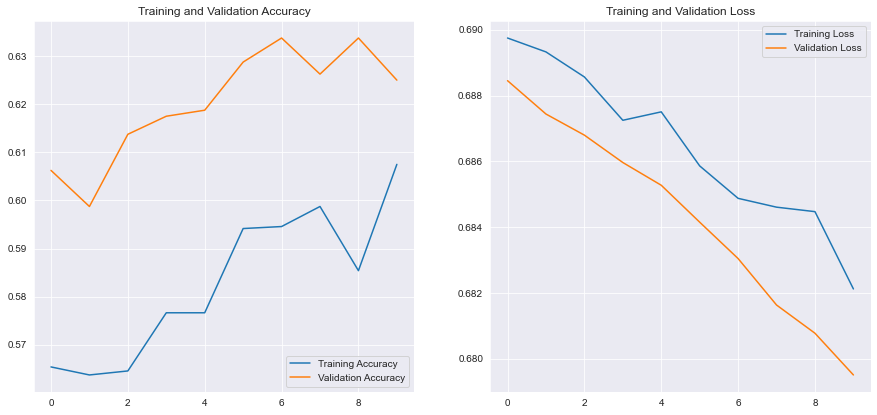

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       400
           1       0.63      0.62      0.62       400

    accuracy                           0.62       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.63      0.62      0.62       800



In [33]:
test = get_data('D:\\Images\\car_dataset\\test')


In [37]:
x_test = []


for feature, label in train:
    x_test.append(feature)
    

# Normalize the data
x_test = np.array(x_train) / 255

x_test.reshape(-1, img_size, img_size, 1)


array([[[[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        ...,

        [[8.61207228e-04],
         [6.15148020e-04],
         [6.92041522e-04],
         ...,
         [2.07612457e-03],
         [1.95309496e-03],
         [1.59938485e-03]],

        [[1.16878124e-03],
         [1.39946175e-03],
         [9.07343329e-04],
         ...,
         [1.96847366e-03],
         [1.23029604e-03],
         [1.30718954e-03]],

        [[1.21491734e-03],
         [1.43021915e-03],
         [1.49173395e-03],
         ...,
 

In [3]:

model.predict_classes(x_test)

NameError: name 'model' is not defined

In [12]:
import keras
import tensorflow as tf
from keras.preprocessing.image import image_data_generator

directory = "'D:\\Images\\car_dataset\\flowers"
dr = 'D:\\Images\\car_dataset\\flower123'
tf.keras.preprocessing.image.DirectoryIterator(
    directory, image_data_generator, target_size=(256, 256),
    color_mode='rgb', classes=None, class_mode='categorical',
    batch_size=32, shuffle=True, seed=None, data_format=None, save_to_dir=dr,
    save_prefix='', save_format='png', follow_links=False,
    subset=None, interpolation='nearest', dtype=None
)

ImportError: cannot import name 'image_data_generator' from 'keras.preprocessing.image' (C:\Users\satyam.singh\anaconda3\envs\keras\lib\site-packages\keras\preprocessing\image.py)